In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 1})
sns.set_style('whitegrid', {'axes.grid': False})
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 8)

In [114]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\AB_NYC_2019.csv


In [115]:
df=pd.read_csv('data\AB_NYC_2019.csv',index_col='id')

In [116]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [117]:
print(f'Shape of dataset :{df.shape}')

Shape of dataset :(48895, 15)


In [118]:
data=df.sort_index().reset_index(drop=True).copy()
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [119]:
data.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [120]:
num_cols=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
data[num_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [121]:
data[data['price']==0].shape

(11, 15)

In [122]:
data[data['availability_365']==0].shape

(17533, 15)

In [123]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [124]:
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [125]:
data['neighbourhood'].nunique()

221

In [126]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [127]:
data.groupby(['neighbourhood_group'])['neighbourhood'].count().sort_values(ascending=False)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood, dtype: int64

In [128]:
data.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

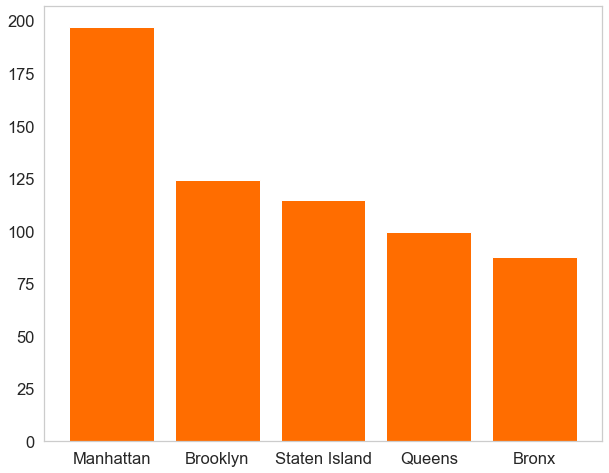

In [129]:
plt.bar(data.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False).index,data.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False).values,color='#FF6D00')
plt.show()

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

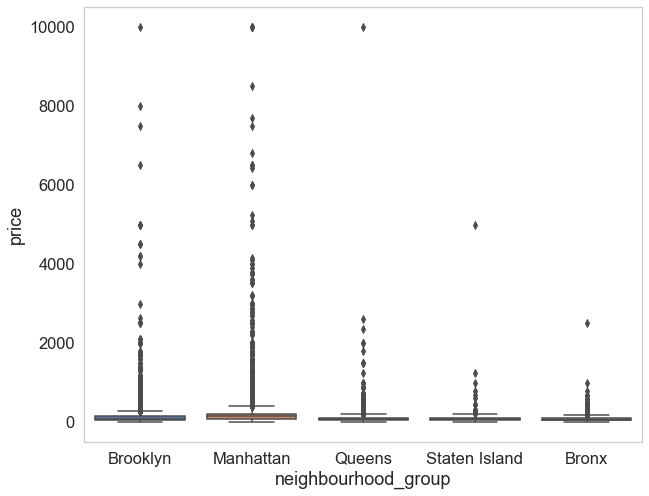

In [134]:
sns.boxplot(x='neighbourhood_group',y='price',data=data)

<AxesSubplot:xlabel='price'>

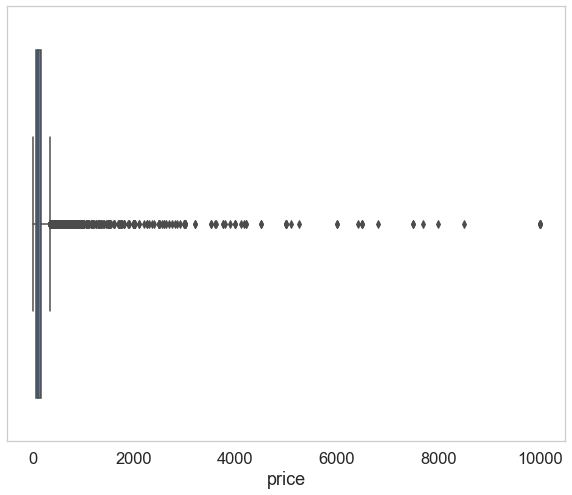

In [135]:
sns.boxplot(data['price'])

In [138]:
quar_1=np.quantile(data['price'],0.25)
quar_2=np.quantile(data['price'],0.75)
filtered=data[(data['price']>quar_1) & (data['price']<quar_2)]
filtered.reset_index(drop=True).head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


<AxesSubplot:xlabel='price', ylabel='Density'>

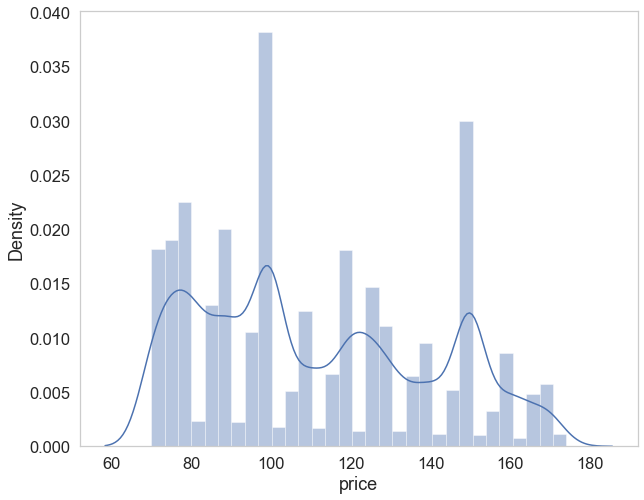

In [141]:
sns.distplot(filtered['price'])

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

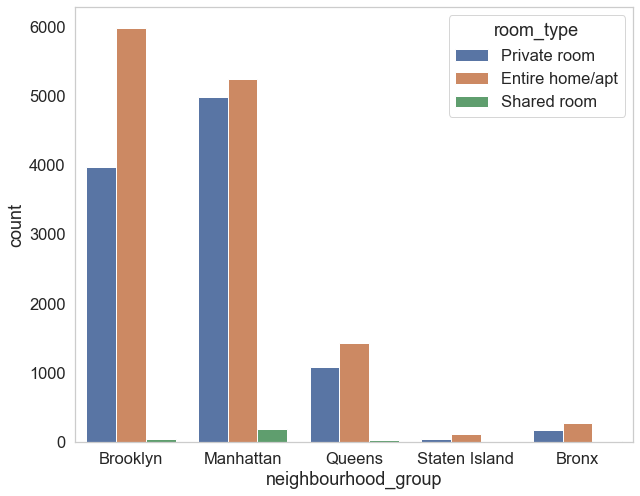

In [143]:
sns.countplot(data=filtered,x='neighbourhood_group',hue='room_type')

<AxesSubplot:xlabel='neighbourhood_group'>

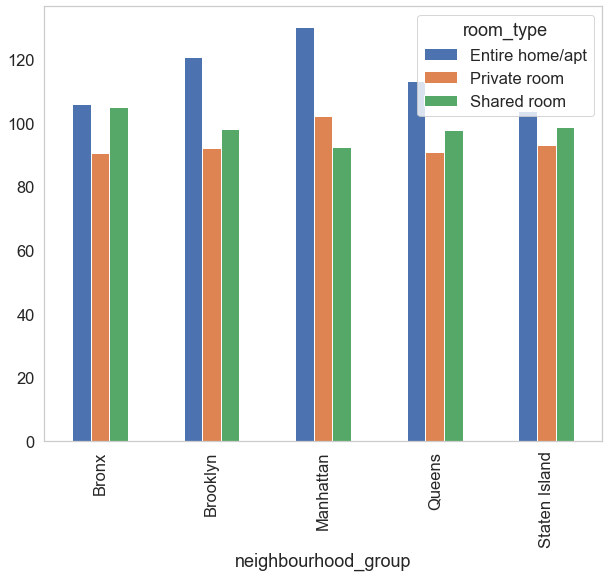

In [147]:
filtered.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind='bar',stacked=False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[0])
ax[0].set_title("Minimum_nights of each Areas by Room Type(Mean)", size=15)
ax[0].set_xlabel("Areas", size=15)
ax[0].set_ylabel("Minimum Nights", size=15)

sns.barplot(data=df, x='neighbourhood_group', y='minimum_nights', hue='room_type', ax=ax[1], estimator=median)
ax[1].set_title("(Median)", size=15)
ax[1].set_xlabel("Areas", size=15)
ax[1].set_ylabel("Minimum Nights", size=15)

plt.show()

In [151]:
filtered['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

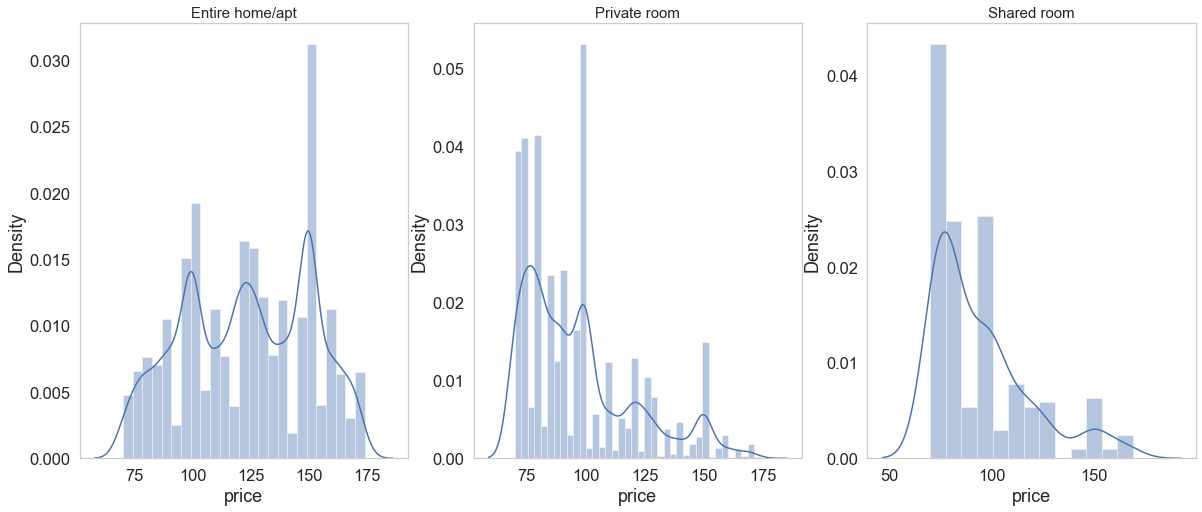

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(filtered[filtered['room_type']=='Entire home/apt']['price'], ax=ax[0])
sns.distplot(filtered[filtered['room_type']=='Private room']['price'], ax=ax[1])
sns.distplot(filtered[filtered['room_type']=='Shared room']['price'], ax=ax[2])
ax[0].set_title("Entire home/apt", size=15)
ax[1].set_title("Private room", size=15)
ax[2].set_title("Shared room", size=15)
plt.show()

In [158]:
sorted_price=filtered.sort_values(by='price',ascending=False)
sorted_price.reset_index(drop=True).head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Two-Bedroom Greenpoint Apartment,3967335,Molly,Brooklyn,Greenpoint,40.72527,-73.95016,Entire home/apt,174,2,31,2019-06-02,0.54,2,12
1,Spacious 1BR in Midtown East by Sonder,12243051,Sonder,Manhattan,Murray Hill,40.74420,-73.97355,Entire home/apt,174,29,0,NaN,NaN,96,311
2,Cozy apartment in the East Village,16149213,David,Manhattan,East Village,40.72541,-73.98398,Entire home/apt,174,2,6,2019-05-19,2.12,1,5
3,Modern Apartment in Historic Brownstone,18940748,Rebeccah & Daniel,Brooklyn,Bedford-Stuyvesant,40.68591,-73.93424,Entire home/apt,174,2,81,2019-06-23,3.39,1,123
4,Dashing 1BR in Midtown East by Sonder,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74422,-73.97309,Entire home/apt,174,29,0,NaN,NaN,327,312


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

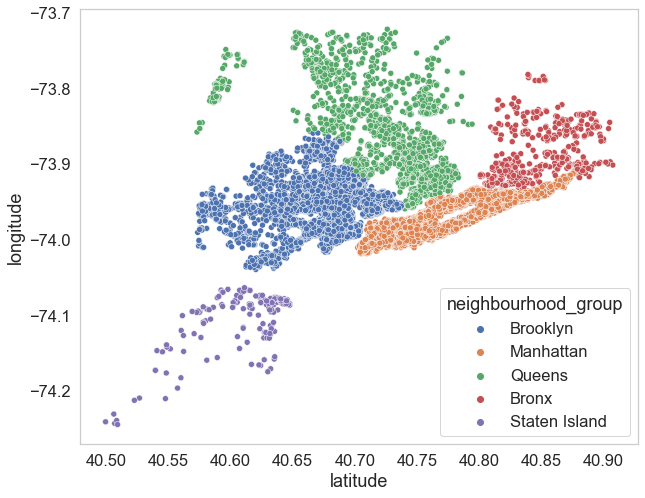

In [175]:
sns.scatterplot(x=sorted_price['latitude'],y=sorted_price['longitude'],hue=sorted_price['neighbourhood_group'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

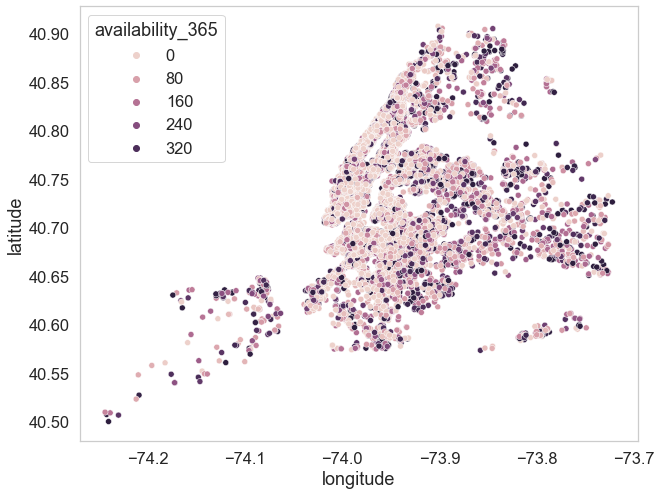

In [176]:
sns.scatterplot(sorted_price.longitude,sorted_price.latitude,hue=sorted_price.availability_365)

<AxesSubplot:>

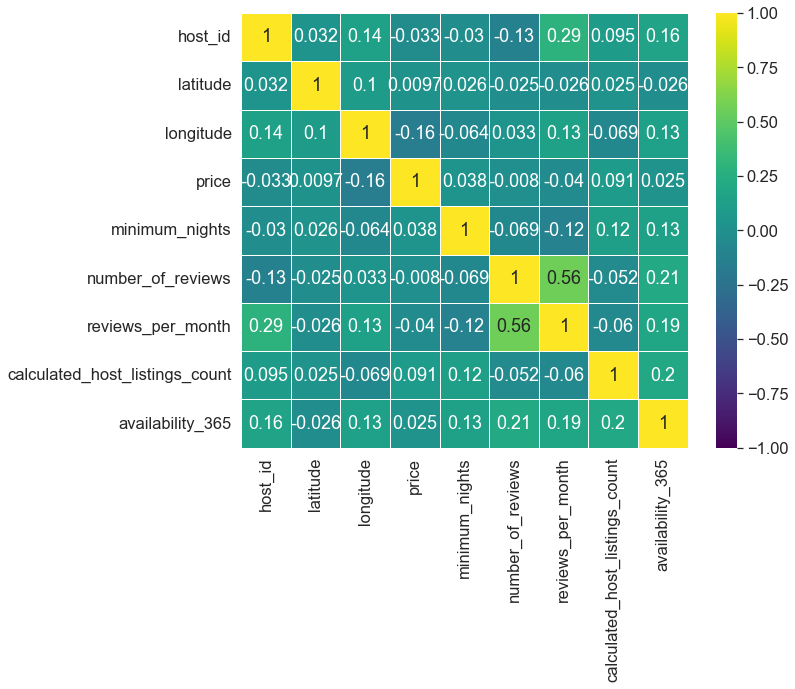

In [182]:
sns.heatmap(sorted_price.corr(),annot=True,vmin=-1,vmax=1,center=0,linewidths=0.5,cmap='viridis')